# Proyecto Modelos de Crédito 3

### Miguel Zatarain
### Estephanie López

## Utilizamos el siguiente codigo para simular una base de datos basada en estadisticas reales
Se busco el ingreso promedio de un mexicano que conta de 16K USD anuales, el salario minimo anual que es de  89,616  y con eso se creo una normal de los ingresos, fue lo unico que se cambio para este dataset

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime, timedelta

# Número de muestras
num_samples = 100000

# Semilla para reproducibilidad
np.random.seed(42)

def generate_correlated_features(num_samples):
    # Generar características base
    age = np.random.normal(40, 12, num_samples).clip(18, 80).astype(int)
    experience = (age - 18 - np.random.normal(4, 2, num_samples).clip(0)).clip(0).astype(int)
    education_level = np.random.choice(['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'], num_samples, p=[0.3, 0.2, 0.3, 0.15, 0.05])
    
    # Impacto de la educación en ingresos y puntaje de crédito
    edu_impact = {'High School': 0, 'Associate': 0.1, 'Bachelor': 0.2, 'Master': 0.3, 'Doctorate': 0.4}
    edu_factor = np.array([edu_impact[level] for level in education_level])
    
    # Generar ingresos anuales y puntaje de crédito correlacionados
    base_income = np.random.lognormal(10.5, 0.6, num_samples) * (1 + edu_factor) * (1 + experience / 100)
    income_noise = np.random.normal(0, 0.1, num_samples)
    annual_income = (base_income * (1 + income_noise)).clip(15000, 300000).astype(int)
    
    # Generar puntaje de crédito
    credit_score_base = 300 + 300 * stats.beta.rvs(5, 1.5, size=num_samples)
    credit_score = (credit_score_base + edu_factor * 100 + experience * 1.5 + income_noise * 100).clip(300, 850).astype(int)
    
    # Generar estado de empleo
    employment_status_probs = np.column_stack([
        0.9 - edu_factor * 0.3,  # Empleado
        0.05 + edu_factor * 0.2,  # Autónomo
        0.05 + edu_factor * 0.1   # Desempleado
    ])
    employment_status = np.array(['Employed', 'Self-Employed', 'Unemployed'])[np.argmax(np.random.random(num_samples)[:, np.newaxis] < employment_status_probs.cumsum(axis=1), axis=1)]
    
    return age, experience, education_level, annual_income, credit_score, employment_status

def generate_time_based_features(num_samples):
    start_date = datetime(2018, 1, 1)
    dates = [start_date + timedelta(days=i) for i in range(num_samples)]
    return dates

# Generar las características
age, experience, education_level, annual_income, credit_score, employment_status = generate_correlated_features(num_samples)
application_dates = generate_time_based_features(num_samples)

# Ajuste de ingresos anuales para el rango 89620 a 592076
min_income = 89620
max_income = 592076

# Generación de ingresos anuales base
base_income = np.random.lognormal(mean=11, sigma=0.5, size=num_samples)

# Escalado de los ingresos para que caigan dentro del rango deseado
scaled_income = min_income + (base_income - base_income.min()) * (max_income - min_income) / (base_income.max() - base_income.min())

# Redondear a enteros
annual_income = scaled_income.round().astype(int)

# Crear DataFrame con los datos generados
data = {
    'ApplicationDate': application_dates,
    'Age': age,
    'AnnualIncome': annual_income,
    'CreditScore': credit_score,
    'EmploymentStatus': employment_status,
    'EducationLevel': education_level,
    'Experience': experience,
    'LoanAmount': np.random.lognormal(10, 0.5, num_samples).astype(int),
    'LoanDuration': np.random.choice([12, 24, 36, 48, 60, 72, 84, 96, 108, 120], num_samples, p=[0.05, 0.1, 0.2, 0.2, 0.2, 0.1, 0.05, 0.05, 0.025, 0.025]),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], num_samples, p=[0.3, 0.5, 0.15, 0.05]),
    'NumberOfDependents': np.random.choice([0, 1, 2, 3, 4, 5], num_samples, p=[0.3, 0.25, 0.2, 0.15, 0.07, 0.03]),
    'HomeOwnershipStatus': np.random.choice(['Own', 'Rent', 'Mortgage', 'Other'], num_samples, p=[0.2, 0.3, 0.4, 0.1]),
    'MonthlyDebtPayments': np.random.lognormal(6, 0.5, num_samples).astype(int),
    'CreditCardUtilizationRate': np.random.beta(2, 5, num_samples),
    'NumberOfOpenCreditLines': np.random.poisson(3, num_samples).clip(0, 15).astype(int),
    'NumberOfCreditInquiries': np.random.poisson(1, num_samples).clip(0, 10).astype(int),
    'DebtToIncomeRatio': np.random.beta(2, 5, num_samples),
    'BankruptcyHistory': np.random.choice([0, 1], num_samples, p=[0.95, 0.05]),
    'LoanPurpose': np.random.choice(['Home', 'Auto', 'Education', 'Debt Consolidation', 'Other'], num_samples, p=[0.3, 0.2, 0.15, 0.25, 0.1]),
    'PreviousLoanDefaults': np.random.choice([0, 1], num_samples, p=[0.9, 0.1]),
    'PaymentHistory': np.random.poisson(24, num_samples).clip(0, 60).astype(int),
    'LengthOfCreditHistory': np.random.randint(1, 30, num_samples),
    'SavingsAccountBalance': np.random.lognormal(8, 1, num_samples).astype(int),
    'CheckingAccountBalance': np.random.lognormal(7, 1, num_samples).astype(int),
    'TotalAssets': np.random.lognormal(11, 1, num_samples).astype(int),
    'TotalLiabilities': np.random.lognormal(10, 1, num_samples).astype(int),
    'MonthlyIncome': annual_income / 12,
    'UtilityBillsPaymentHistory': np.random.beta(8, 2, num_samples),
    'JobTenure': np.random.poisson(5, num_samples).clip(0, 40).astype(int),
}

# Crear DataFrame
df = pd.DataFrame(data)

# Asegurarse de que TotalAssets sea siempre mayor o igual a la suma de SavingsAccountBalance y CheckingAccountBalance
df['TotalAssets'] = np.maximum(df['TotalAssets'], df['SavingsAccountBalance'] + df['CheckingAccountBalance'])

# Agregar más características derivadas complejas
min_net_worth = 1000  # Establecer un valor mínimo de patrimonio neto
df['NetWorth'] = np.maximum(df['TotalAssets'] - df['TotalLiabilities'], min_net_worth)

# Guardar en un archivo CSV
df.to_csv('focused_synthetic_loan_data.csv', index=False)

# Mostrar estadísticas de los ingresos anuales generados
print(f"Rango de ingresos anuales: {df['AnnualIncome'].min()} - {df['AnnualIncome'].max()}")
print(f"Promedio de ingresos Mensuales: {df['MonthlyIncome'].mean():.2f}")


Rango de ingresos anuales: 89620 - 592076
Promedio de ingresos Mensuales: 12815.59


## Vemos la relevancia que tienen las variables con el credit score

Para esto utilizamos Random Forest

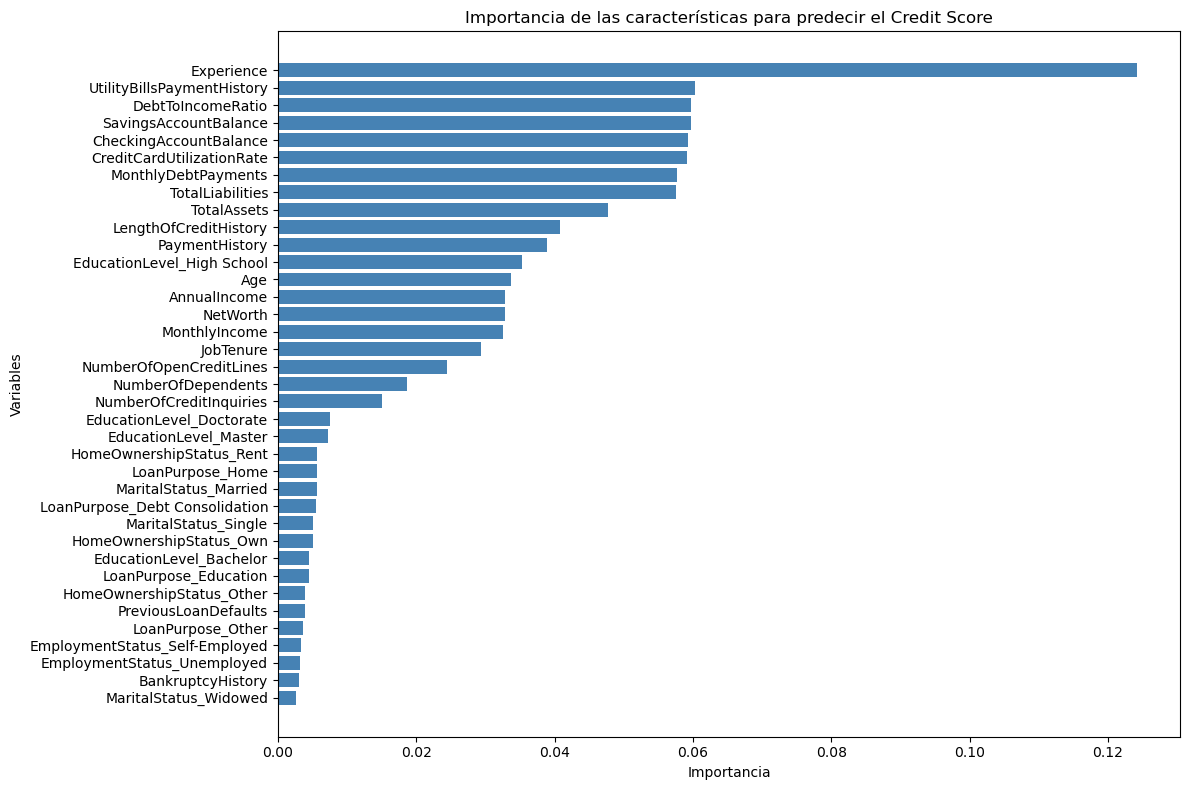

Variables más importantes para predecir el Credit Score:
                          Variable  Importancia
2                       Experience     0.124222
18      UtilityBillsPaymentHistory     0.060239
8                DebtToIncomeRatio     0.059761
13           SavingsAccountBalance     0.059694
14          CheckingAccountBalance     0.059320
5        CreditCardUtilizationRate     0.059107
4              MonthlyDebtPayments     0.057683
16                TotalLiabilities     0.057513
15                     TotalAssets     0.047785
12           LengthOfCreditHistory     0.040832
11                  PaymentHistory     0.038919
25      EducationLevel_High School     0.035311
0                              Age     0.033766
1                     AnnualIncome     0.032845
20                        NetWorth     0.032831
17                   MonthlyIncome     0.032585
19                       JobTenure     0.029423
6          NumberOfOpenCreditLines     0.024462
3               NumberOfDepende

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Cargar los datos
# Asegúrate de reemplazar 'archivo.csv' con la ruta de tu archivo
df = pd.read_csv('focused_synthetic_loan_data.csv')
df_rf=df.copy()

# 2. Limpiar columnas irrelevantes
columnas_irrelevantes = ['InterestRate', 'LoanDuration', 'LoanAmount','ApplicationDate', 'LoanApproved', 'RiskScore', 'BaseInterestRate','MonthlyLoanPayment']
df_rf = df_rf.drop(columns=columnas_irrelevantes, errors='ignore')


# 3. Identificar y convertir variables categóricas
# Variables categóricas conocidas
categoricas = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'LoanPurpose', 'HomeOwnershipStatus']

# Codificación One-Hot para variables categóricas
df_rf = pd.get_dummies(df_rf, columns=categoricas, drop_first=True)

# 4. Separar características (X) y la variable objetivo (y)
X = df_rf.drop(columns=['CreditScore'])  # Ajusta si el nombre es diferente
y = df_rf['CreditScore']

# 5. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Entrenar el modelo de Random Forest
modelo = RandomForestRegressor(random_state=42, n_estimators=100)
modelo.fit(X_train, y_train)

# 7. Calcular la importancia de las características
importancia = pd.DataFrame({'Variable': X.columns, 'Importancia': modelo.feature_importances_})
importancia = importancia.sort_values(by='Importancia', ascending=False)

# 8. Visualizar las principales variables
plt.figure(figsize=(12, 8))
plt.barh(importancia['Variable'], importancia['Importancia'], color='steelblue')
plt.gca().invert_yaxis()  # Las más importantes primero
plt.title("Importancia de las características para predecir el Credit Score")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# 9. Mostrar las principales variables
print("Variables más importantes para predecir el Credit Score:")
print(importancia)


## Quitamos todas las variables que dependan del historial crediticio

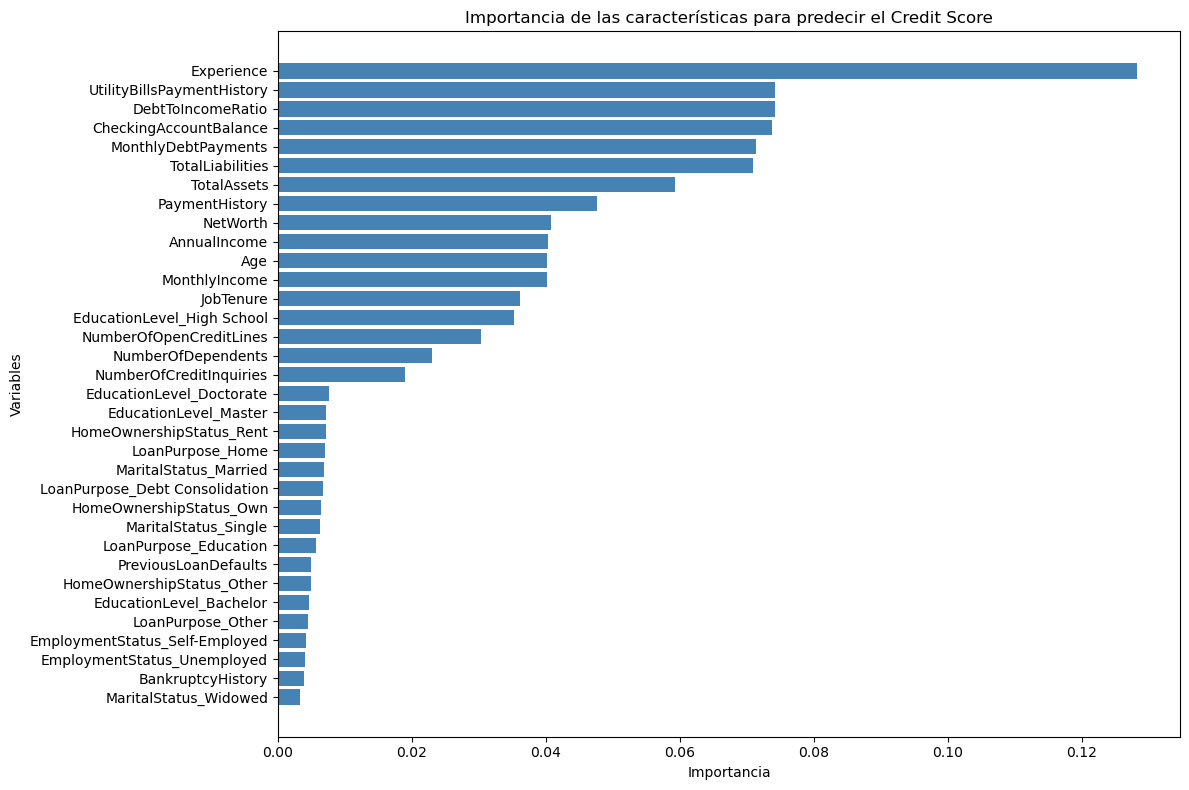

Variables más importantes para predecir el Credit Score:
                          Variable  Importancia
2                       Experience     0.128276
15      UtilityBillsPaymentHistory     0.074150
7                DebtToIncomeRatio     0.074150
11          CheckingAccountBalance     0.073735
4              MonthlyDebtPayments     0.071417
13                TotalLiabilities     0.070925
12                     TotalAssets     0.059226
10                  PaymentHistory     0.047695
17                        NetWorth     0.040712
1                     AnnualIncome     0.040279
0                              Age     0.040194
14                   MonthlyIncome     0.040191
16                       JobTenure     0.036078
22      EducationLevel_High School     0.035311
5          NumberOfOpenCreditLines     0.030262
3               NumberOfDependents     0.023045
6          NumberOfCreditInquiries     0.018944
21        EducationLevel_Doctorate     0.007600
23           EducationLevel_Mas

In [3]:

# 1. Cargar los datos
# Asegúrate de reemplazar 'archivo.csv' con la ruta de tu archivo
df_rf2=df.copy()

# 2. Limpiar columnas irrelevantes
columnas_irrelevantes = ['InterestRate', 'LoanDuration', 'LoanAmount','ApplicationDate', 'LoanApproved', 'RiskScore', 'BaseInterestRate','LengthOfCreditHistory','MonthlyLoanPayment','CreditCardUtilizationRate','SavingsAccountBalance',' LengthOfCreditHistory',' PaymentHistory',]
df_rf2 = df_rf2.drop(columns=columnas_irrelevantes, errors='ignore')


# 3. Identificar y convertir variables categóricas
# Variables categóricas conocidas
categoricas = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'LoanPurpose', 'HomeOwnershipStatus']

# Codificación One-Hot para variables categóricas
df_rf2 = pd.get_dummies(df_rf2, columns=categoricas, drop_first=True)

# 4. Separar características (X) y la variable objetivo (y)
X = df_rf2.drop(columns=['CreditScore'])  # Ajusta si el nombre es diferente
y = df_rf2['CreditScore']

# 5. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Entrenar el modelo de Random Forest
modelo = RandomForestRegressor(random_state=42, n_estimators=100)
modelo.fit(X_train, y_train)

# 7. Calcular la importancia de las características
importancia = pd.DataFrame({'Variable': X.columns, 'Importancia': modelo.feature_importances_})
importancia = importancia.sort_values(by='Importancia', ascending=False)

# 8. Visualizar las principales variables
plt.figure(figsize=(12, 8))
plt.barh(importancia['Variable'], importancia['Importancia'], color='steelblue')
plt.gca().invert_yaxis()  # Las más importantes primero
plt.title("Importancia de las características para predecir el Credit Score")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# 9. Mostrar las principales variables
print("Variables más importantes para predecir el Credit Score:")
print(importancia)

###  Variables a considerar en base a la correlación


Las variables que se tomaran en cuenta para la penalización seran las siguientes:
|Variable                  | Ponderación |
|--------------------------|-------------|
|Experience                |0.128276     |
|UtilityBillsPaymentHistory|0.074150     |
|MonthlyDebtPayments       |0.071417     |
|TotalLiabilities          |0.070925     |
|DebtToIncomeRatio         |0.074150     |
|TotalAssets               |0.059226     |
|Age                       |0.040194     |
|NetWorth                  |0.040712     |
|NumberOfDependents        |0.023045     |

In [4]:
importancia

,Variable,Importancia
2,Experience,0.128276
15,UtilityBillsPaymentHistory,0.074150
7,DebtToIncomeRatio,0.074150
11,CheckingAccountBalance,0.073735
4,MonthlyDebtPayments,0.071417
13,TotalLiabilities,0.070925
12,TotalAssets,0.059226
10,PaymentHistory,0.047695
17,NetWorth,0.040712
1,AnnualIncome,0.040279


## Condicionales de nuestra tarjeta de credito

#### Los puntos en nuestro banco se otorgaran inicalmente de la siguiente forma:
| Remanente| 20K MXN/Mes | 
|----------|-------------|
| 5%       | 220         |
| 10%      | 285         | 
| 15%      | 350         | 


 

In [5]:
# Calcular el porcentaje remanente respecto al ingreso mensual y agregarlo como nueva columna
df['%Sobrante'] = (df['SavingsAccountBalance'] / df['MonthlyIncome']) * 100



In [6]:
# Función para calcular el puntaje
def calcular_puntaje(fila):
    if fila['MonthlyIncome'] >= 20000:  # Ingreso mensual mayor o igual a 25K
        if fila['%Sobrante'] >= 15:
            return 350  # Puntaje para %Sobrante >= 15
        elif fila['%Sobrante'] >= 10:
            
            return 285  # Puntaje para %Sobrante >= 10
        elif fila['%Sobrante'] >= 5:
            return 220  # Puntaje para %Sobrante >= 5
    return 0  # Si no cumple las condiciones, asignar 0

# Aplicar la función a cada fila del DataFrame
df['Puntaje'] = df.apply(calcular_puntaje, axis=1)



In [7]:
# Eliminar filas con ingreso mensual menor a 25K
df = df[df['MonthlyIncome']> 20000]

# Mostrar el número de filas restantes
print(f"El DataFrame ahora tiene {len(df)} filas después de eliminar las filas con ingresos menores a 20K.")


El DataFrame ahora tiene 3412 filas después de eliminar las filas con ingresos menores a 20K.


In [8]:
# Eliminar filas con ingreso mensual menor a 25K
df = df[df['%Sobrante']> 5]

# Mostrar el número de filas restantes
print(f"El DataFrame ahora tiene {len(df)} filas después de eliminar las filas con ingresos menores a 20K.")

El DataFrame ahora tiene 2805 filas después de eliminar las filas con ingresos menores a 20K.


In [9]:
#Creamos una copia de la columna puntaje para tenerla como referencia
df['Puntaje Inicial']=df['Puntaje']
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,%Sobrante,Puntaje,Puntaje Inicial
23,2018-01-24 00:00:00,22,255823,528,Employed,Associate,3,20274,12,Married,...,914,41396,61233,21318.583333,0.874445,3,1000,6.271524,220,220
28,2018-01-29 00:00:00,32,250732,553,Unemployed,High School,10,61117,48,Single,...,1528,63637,11113,20894.333333,0.892534,4,52524,129.728954,350,350
42,2018-02-12 00:00:00,38,263095,631,Unemployed,High School,18,35528,84,Married,...,867,25960,45199,21924.583333,0.794023,3,1000,7.056006,220,220
100,2018-04-11 00:00:00,23,261659,584,Employed,Master,0,27138,24,Single,...,1362,34188,92532,21804.916667,0.817425,7,1000,7.177280,220,220
112,2018-04-23 00:00:00,40,241642,524,Employed,High School,19,13758,72,Single,...,2690,178672,58837,20136.833333,0.506243,6,119835,6.490594,220,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99819,2291-04-19 00:00:00,31,302525,447,Self-Employed,Bachelor,8,29304,48,Married,...,1100,13324,15411,25210.416667,0.948157,7,1000,5.989588,220,220
99937,2291-08-15 00:00:00,51,240709,584,Employed,Bachelor,31,17890,24,Divorced,...,939,395754,33692,20059.083333,0.842429,5,362062,13.320649,285,285
99949,2291-08-27 00:00:00,34,283506,581,Unemployed,Bachelor,11,13988,60,Married,...,2530,199360,21998,23625.500000,0.789250,8,177362,31.296692,350,350
99985,2291-10-02 00:00:00,45,284049,531,Employed,Associate,22,20071,96,Married,...,326,85122,71786,23670.750000,0.840306,5,13336,12.196487,285,285


## Normalizamos variables y Penalizamos 
**Penalización por experiencia (Experience):** Se calcula la penalización proporcional a la diferencia entre la experiencia de la persona y la experiencia mínima necesaria según su edad.<br>
**Penalización por historial de pagos de servicios (UtilityBillsPaymentHistory):** Cuanto menor sea el valor de esta columna (más cerca de 0), más se penaliza.<br>
**Penalización por pagos mensuales de deuda (MonthlyDebtPayments):** Se calcula como el porcentaje del ingreso mensual que se destina a pagos de deuda.<br>
**Penalización por ratio de deuda a ingreso (DebtToIncomeRatio):** Se penaliza más cuanto mayor sea el ratio.<br>
**Penalización por activos totales (TotalAssets):** Se calcula la proporción de activos con respecto al ingreso anual y se penaliza según esa proporción.<br>
**Penalización por edad (Age):** Cuanto más joven es la persona (menor a 18 años), más se penaliza.<br>
**Penalización por patrimonio neto (NetWorth):** Se calcula como la relación entre el patrimonio neto y el ingreso anual, penalizando más si esta relación es baja.<br>
**Penalización por número de dependientes (NumberOfDependents):** Cuanto mayor sea el número de dependientes, mayor será la penalización.<br>

In [10]:
# Ponderaciones normalizadas de las variables
weights = {
    'Experience': 0.128276,
    'UtilityBillsPaymentHistory': 0.074150,
    'MonthlyDebtPayments': 0.071417,
    'TotalLiabilities': 0.070925,
    'DebtToIncomeRatio': 0.074150,
    'TotalAssets': 0.059226,
    'Age': 	0.040194,
    'NetWorth':0.040712,
    'NumberOfDependents': 0.023045
}

# Calcular la suma total de las ponderaciones
total_weight = sum(weights.values())
print(f"Suma total de ponderaciones: {total_weight}") # Normalizar las ponderaciones para que sumen 1
normalized_weights = {k: v / total_weight for k, v in weights.items()}

# Imprimir las ponderaciones normalizadas
print("Ponderaciones normalizadas:")
for var, weight in normalized_weights.items():
    print(f"{var}: {weight:.6f}")

def aplicar_penalizacion(row, df):
    # Penalización proporcional a la edad para Experience
    if row['Age'] <= 21:
        penalizacion_experience = 0
    else:
        experiencia_requerida = row['Age'] - 21
        if row['Experience'] < experiencia_requerida:
            penalizacion_experience = (experiencia_requerida - row['Experience']) / experiencia_requerida
        else:
            penalizacion_experience = 0

    # Penalización en UtilityBillsPaymentHistory (menos pago, mayor penalización)
    penalizacion_utility_bills = 1 - row['UtilityBillsPaymentHistory']

    # Penalización en MonthlyDebtPayments (más deuda, mayor penalización)
    penalizacion_debt_payments = row['MonthlyDebtPayments'] / row['MonthlyIncome'] if row['MonthlyIncome'] > 0 else 0

    # Penalización en DebtToIncomeRatio (menos ratio, menor penalización)
    penalizacion_debt_to_income = row['DebtToIncomeRatio']

    # Penalización en TotalAssets (más activos comparado con ingreso anual, menor penalización)
    total_assets_to_income = row['TotalAssets'] / row['AnnualIncome'] if row['AnnualIncome'] > 0 else 0
    penalizacion_total_assets = (total_assets_to_income - df['TotalAssets'].min()) / (df['TotalAssets'].max() - df['TotalAssets'].min()) if df['TotalAssets'].max() != df['TotalAssets'].min() else 0

    # Penalización en Age (si es menor o igual a 18, penaliza al máximo)
    penalizacion_age = (row['Age'] - 18) / (df['Age'].max() - 18) if row['Age'] > 18 else 1

    # Penalización en NetWorth (si es 0, penaliza al máximo, proporcional al ingreso anual)
    networth_to_income = row['NetWorth'] / row['AnnualIncome'] if row['AnnualIncome'] > 0 else 0
    penalizacion_net_worth = networth_to_income if networth_to_income < 1 else 0

    # Penalización en NumberOfDependents (más dependientes, mayor penalización)
    penalizacion_dependents = row['NumberOfDependents'] / df['NumberOfDependents'].max() if df['NumberOfDependents'].max() != 0 else 0

    # Penalización total ponderada usando las nuevas ponderaciones normalizadas
    total_penalizacion = (penalizacion_experience * normalized_weights['Experience'] + 
                          penalizacion_utility_bills * normalized_weights['UtilityBillsPaymentHistory'] + 
                          penalizacion_debt_payments * normalized_weights['MonthlyDebtPayments'] + 
                          penalizacion_total_assets * normalized_weights['TotalAssets'] + 
                          penalizacion_debt_to_income * normalized_weights['DebtToIncomeRatio'] + 
                          penalizacion_age * normalized_weights['Age'] + 
                          penalizacion_net_worth * normalized_weights['NetWorth'] + 
                          penalizacion_dependents * normalized_weights['NumberOfDependents'])
    
    # Aplicar la penalización al Puntaje (ajustando el puntaje original)
    row['Puntaje'] = row['Puntaje'] * (1 - total_penalizacion)
    
    return row

# Suponiendo que 'df' es el DataFrame que ya tiene la columna 'Puntaje' inicializada
# Aplicar la función de penalización fila por fila
df = df.apply(lambda row: aplicar_penalizacion(row, df), axis=1)

# Mostrar las primeras filas para verificar los resultados
print(df.head())

# Ver las filas donde el puntaje es mayor a 150
rows_above_150 = df[df['Puntaje'] > 250*.40]
print(f"Filas con puntaje mayor a 150: {len(rows_above_150)}")


Suma total de ponderaciones: 0.581179
Ponderaciones normalizadas:
Experience: 0.200566
UtilityBillsPaymentHistory: 0.124430
MonthlyDebtPayments: 0.123446
TotalLiabilities: 0.122984
DebtToIncomeRatio: 0.120725
TotalAssets: 0.100783
Age: 0.099104
NetWorth: 0.070125
NumberOfDependents: 0.037837
         ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
23   2018-01-24 00:00:00   22        255823          528         Employed   
28   2018-01-29 00:00:00   32        250732          553       Unemployed   
42   2018-02-12 00:00:00   38        263095          631       Unemployed   
100  2018-04-11 00:00:00   23        261659          584         Employed   
112  2018-04-23 00:00:00   40        241642          524         Employed   

    EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
23       Associate           3       20274            12       Married  ...   
28     High School          10       61117            48        Single  ...   
42     

## Con esta logica aprobariamos 2805 creditos de 100,000 personas que seria el 2.80% de la poblacion, esto sin tomar en cuenta EL HISTORIAL CREDITICIO PARA NADA<br>




### Comparación de tasas de interes de productos parecidos o con las mismas caracteristicas

**BBVA Azul:** 50.30%. El CAT promedio ponderado es de 70.7% sin IVA.<br>
**Oro CitiBanamex:** CAT promedio ponderado 61.5% sin IVA, tasa de interés promedio ponderada por saldo en términos anuales 46.45%<br>
**Coppel:** La tasa de interés ponderada es de 63.1% sin IVA.<br>
**Vexi Carnet:**  es de 47.42% sin IVA. El CAT promedio anual es de 72.10%<br>. 
**Vexi AMEX:** promedio ponderada por saldo en términos anuales sin IVA de la tarjeta Vexi American Express es de 31.35%<br>
**Stori:** 99.9% anual variable sin IVA. El CAT (Costo Anual Total) promedio ponderado es de 152.80% sin IVA<br>
**Banorte Conmigo:**  es del 64.91% anual sin IVA<br>

In [11]:
a=50.30+61.5+63.1+47.2+31.35+99.9+64.91
a=a/7
print('Tasa promedio anual',a)
print('Tasa promedio mensual',a/12)

Tasa promedio anual 59.75142857142857
Tasa promedio mensual 4.979285714285714


### Ponderación de la Tasa
| **Componente**           | **Ponderador (%)** | **Tasa (%)** |
|---------------------------|--------------------|--------------|
| Base Rate                | 30%               | 17.93        |
| Inflation Premium        | 15%               | 8.96         |
| Credit Risk Premium      | 35%               | 20.91        |
| Liquidity Premium        | 5%                | 2.99         |
| Administrative Costs     | 10%               | 5.98         |
| Profit Margin            | 5%                | 2.99         |
|--------------------------|-------------------|--------------|
| Tasa Total               | 100%              | 59.75%       |

Este será el meximo de tasa de interes que se utiizara para las personas que hayan perdido más puntos en la pontedacion, con el tiempo si mantienen un buen historial de pago y un buen comportamiento financiero podran reducirla

# Monto de aprobacion 

Partiremos del monto de ingreso mensual, de ahi en base a los puntos que hayan perdido se reducira el monto
el valor de cada punto es igual a el total de puntos obtenidos en el primer filtro (ingreso>20K mensual & 5% minimo de remanente mensual)
una vez obtenido el total de ingreso mensual menos la multiplicacion de los puntos perdidos por el valor de cada punto muntiplicamos el monto por 4 y ese es el monto de aprobación 

In [12]:
df['Monto Inicial de aprobacion']=df['MonthlyIncome']
df['Puntaje perdido']=(df['Puntaje Inicial']-df['Puntaje'])

In [13]:
df['Valor por punto perdido']=(df['MonthlyIncome']/df['Puntaje Inicial'])
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,%Sobrante,Puntaje,Puntaje Inicial,Monto Inicial de aprobacion,Puntaje perdido,Valor por punto perdido
23,2018-01-24 00:00:00,22,255823,528,Employed,Associate,3,20274,12,Married,...,21318.583333,0.874445,3,1000,6.271524,205.089844,220,21318.583333,14.910156,96.902652
28,2018-01-29 00:00:00,32,250732,553,Unemployed,High School,10,61117,48,Single,...,20894.333333,0.892534,4,52524,129.728954,319.427972,350,20894.333333,30.572028,59.698095
42,2018-02-12 00:00:00,38,263095,631,Unemployed,High School,18,35528,84,Married,...,21924.583333,0.794023,3,1000,7.056006,200.596168,220,21924.583333,19.403832,99.657197
100,2018-04-11 00:00:00,23,261659,584,Employed,Master,0,27138,24,Single,...,21804.916667,0.817425,7,1000,7.177280,162.464251,220,21804.916667,57.535749,99.113258
112,2018-04-23 00:00:00,40,241642,524,Employed,High School,19,13758,72,Single,...,20136.833333,0.506243,6,119835,6.490594,169.831703,220,20136.833333,50.168297,91.531061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99819,2291-04-19 00:00:00,31,302525,447,Self-Employed,Bachelor,8,29304,48,Married,...,25210.416667,0.948157,7,1000,5.989588,188.560974,220,25210.416667,31.439026,114.592803
99937,2291-08-15 00:00:00,51,240709,584,Employed,Bachelor,31,17890,24,Divorced,...,20059.083333,0.842429,5,362062,13.320649,245.484231,285,20059.083333,39.515769,70.382749
99949,2291-08-27 00:00:00,34,283506,581,Unemployed,Bachelor,11,13988,60,Married,...,23625.500000,0.789250,8,177362,31.296692,294.830538,350,23625.500000,55.169462,67.501429
99985,2291-10-02 00:00:00,45,284049,531,Employed,Associate,22,20071,96,Married,...,23670.750000,0.840306,5,13336,12.196487,233.472812,285,23670.750000,51.527188,83.055263


In [14]:
df['Monto de Aprobacion']=(df['Valor por punto perdido']*df['Puntaje perdido'])*4

df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,%Sobrante,Puntaje,Puntaje Inicial,Monto Inicial de aprobacion,Puntaje perdido,Valor por punto perdido,Monto de Aprobacion
23,2018-01-24 00:00:00,22,255823,528,Employed,Associate,3,20274,12,Married,...,0.874445,3,1000,6.271524,205.089844,220,21318.583333,14.910156,96.902652,5779.334484
28,2018-01-29 00:00:00,32,250732,553,Unemployed,High School,10,61117,48,Single,...,0.892534,4,52524,129.728954,319.427972,350,20894.333333,30.572028,59.698095,7300.367324
42,2018-02-12 00:00:00,38,263095,631,Unemployed,High School,18,35528,84,Married,...,0.794023,3,1000,7.056006,200.596168,220,21924.583333,19.403832,99.657197,7734.926071
100,2018-04-11 00:00:00,23,261659,584,Employed,Master,0,27138,24,Single,...,0.817425,7,1000,7.177280,162.464251,220,21804.916667,57.535749,99.113258,22810.221885
112,2018-04-23 00:00:00,40,241642,524,Employed,High School,19,13758,72,Single,...,0.506243,6,119835,6.490594,169.831703,220,20136.833333,50.168297,91.531061,18367.829692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99819,2291-04-19 00:00:00,31,302525,447,Self-Employed,Bachelor,8,29304,48,Married,...,0.948157,7,1000,5.989588,188.560974,220,25210.416667,31.439026,114.592803,14410.744292
99937,2291-08-15 00:00:00,51,240709,584,Employed,Bachelor,31,17890,24,Divorced,...,0.842429,5,362062,13.320649,245.484231,285,20059.083333,39.515769,70.382749,11124.913778
99949,2291-08-27 00:00:00,34,283506,581,Unemployed,Bachelor,11,13988,60,Married,...,0.789250,8,177362,31.296692,294.830538,350,23625.500000,55.169462,67.501429,14896.069932
99985,2291-10-02 00:00:00,45,284049,531,Employed,Associate,22,20071,96,Married,...,0.840306,5,13336,12.196487,233.472812,285,23670.750000,51.527188,83.055263,17118.416518


In [15]:
print('Limite Maximo Aprobado',df['Monto de Aprobacion'].max())
print('Limite Minimo Aprobado',df['Monto de Aprobacion'].min())

Limite Maximo Aprobado 50739.82288301557
Limite Minimo Aprobado 2908.8607274276264


## Tabla de Tasa/ Monto aprobación en base al score obtenido

| **PUNTAJE** | **TASA** | **Margen** |
|-------------|----------|------------|
| 350         | 40%      | 26%        |
| 300         | 45%      | 31%        |
| 250         | 50%      | 36%        |
| 200         | 55%      | 41%        |
| 150         | 60%      | 46%        |




## Ponemos Margen y Tasa a todas las filas del dataframe

In [16]:
import numpy as np

# Función para asignar Tasa y Margen
def asignar_tasa_y_margen(row):
    if row['Puntaje'] >= 350:
        return 0.40, 0.26
    elif 300 <= row['Puntaje'] < 350:
        return 0.45, 0.31
    elif 250 <= row['Puntaje'] < 300:
        return 0.50, 0.36
    elif 200 <= row['Puntaje'] < 250:
        return 0.55, 0.41
    elif 150 <= row['Puntaje'] < 200:
        return 0.60, 0.46
    else:
        return np.nan, np.nan  # Para puntajes fuera del rango especificado

# Aplicar la función a todo el DataFrame
df[['Tasa', 'Margen']] = df.apply(lambda row: pd.Series(asignar_tasa_y_margen(row)), axis=1)

# Verificar el resultado
df


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,NetWorth,%Sobrante,Puntaje,Puntaje Inicial,Monto Inicial de aprobacion,Puntaje perdido,Valor por punto perdido,Monto de Aprobacion,Tasa,Margen
23,2018-01-24 00:00:00,22,255823,528,Employed,Associate,3,20274,12,Married,...,1000,6.271524,205.089844,220,21318.583333,14.910156,96.902652,5779.334484,0.55,0.41
28,2018-01-29 00:00:00,32,250732,553,Unemployed,High School,10,61117,48,Single,...,52524,129.728954,319.427972,350,20894.333333,30.572028,59.698095,7300.367324,0.45,0.31
42,2018-02-12 00:00:00,38,263095,631,Unemployed,High School,18,35528,84,Married,...,1000,7.056006,200.596168,220,21924.583333,19.403832,99.657197,7734.926071,0.55,0.41
100,2018-04-11 00:00:00,23,261659,584,Employed,Master,0,27138,24,Single,...,1000,7.177280,162.464251,220,21804.916667,57.535749,99.113258,22810.221885,0.60,0.46
112,2018-04-23 00:00:00,40,241642,524,Employed,High School,19,13758,72,Single,...,119835,6.490594,169.831703,220,20136.833333,50.168297,91.531061,18367.829692,0.60,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99819,2291-04-19 00:00:00,31,302525,447,Self-Employed,Bachelor,8,29304,48,Married,...,1000,5.989588,188.560974,220,25210.416667,31.439026,114.592803,14410.744292,0.60,0.46
99937,2291-08-15 00:00:00,51,240709,584,Employed,Bachelor,31,17890,24,Divorced,...,362062,13.320649,245.484231,285,20059.083333,39.515769,70.382749,11124.913778,0.55,0.41
99949,2291-08-27 00:00:00,34,283506,581,Unemployed,Bachelor,11,13988,60,Married,...,177362,31.296692,294.830538,350,23625.500000,55.169462,67.501429,14896.069932,0.50,0.36
99985,2291-10-02 00:00:00,45,284049,531,Employed,Associate,22,20071,96,Married,...,13336,12.196487,233.472812,285,23670.750000,51.527188,83.055263,17118.416518,0.55,0.41


## Suponemos que gastaran 10%, 20% 30% y todo lo de la tarjeta y sacamos cuanto ganariamos



In [17]:
df['Ganancia si usan todo']=df['Margen']*df['Monto de Aprobacion']
df['Ganancia si solo usan un 10%']=df['Margen']*(df['Monto de Aprobacion']*.10)
df['Ganancia si solo usan un 20%']=df['Margen']*(df['Monto de Aprobacion']*.20)
df['Ganancia si solo usan un 30%']=df['Margen']*(df['Monto de Aprobacion']*.30)
Ganancias=pd.DataFrame()

Ganancias = {
    'Ganancia si solo usan un 10%': df['Ganancia si solo usan un 10%'].sum(),
    'Ganancia si solo usan un 20%': df['Ganancia si solo usan un 20%'].sum(),
    'Ganancia si solo usan un 30%': df['Ganancia si solo usan un 30%'].sum(),
    'Ganancia si usan todo %': df['Ganancia si usan todo'].sum()
}

Ganancias = pd.DataFrame([Ganancias], index=['Utilidades Brutas'])
Ganancias


,Ganancia si solo usan un 10%,Ganancia si solo usan un 20%,Ganancia si solo usan un 30%,Ganancia si usan todo %
Utilidades Brutas,1.520686e+06,3.041372e+06,4.562058e+06,1.520686e+07


Esto es lo que tendriamos de utilidad bruta en cada escenario<br>
mas el 1% de cada transaccion que se haga <br>
# A esto falta descontarle gastos de operación 
-sueldos<br>
-gastos operativos<br>

## INTENTO DE CALCULAR EL VaR

sacar porcentaje de default en base al puntaje 
probdefault=df['Puntaje perdido']/350
probdefault=df['Puntaje perdido']/df['Puntaje Inicial']
de ahi sacar Var

In [31]:
df['probdefault']=df['Puntaje perdido']/350

In [33]:
df['probdefault']

23       0.042600
28       0.087349
42       0.055440
100      0.164388
112      0.143338
           ...   
99819    0.089826
99937    0.112902
99949    0.157627
99985    0.147221
99997    0.087306
Name: probdefault, Length: 2805, dtype: float64

In [36]:
df['random_number'] = np.random.rand(len(df))
df['random_number']

23       0.724570
28       0.012071
42       0.563524
100      0.903737
112      0.047397
           ...   
99819    0.175072
99937    0.128608
99949    0.601478
99985    0.164468
99997    0.418823
Name: random_number, Length: 2805, dtype: float64

In [42]:
df['perdida'] = df.loc[df['random_number'] < df['probdefault'], 'Monto de Aprobacion']
df[['random_number', 'Monto de Aprobacion','probdefault', 'perdida']]


,random_number,Monto de Aprobacion,probdefault,perdida
23,0.724570,5779.334484,0.042600,NaN
28,0.012071,7300.367324,0.087349,7300.367324
42,0.563524,7734.926071,0.055440,NaN
100,0.903737,22810.221885,0.164388,NaN
112,0.047397,18367.829692,0.143338,18367.829692
...,...,...,...,...
99819,0.175072,14410.744292,0.089826,NaN
99937,0.128608,11124.913778,0.112902,NaN
99949,0.601478,14896.069932,0.157627,NaN
99985,0.164468,17118.416518,0.147221,NaN


In [44]:
df['perdida'] = df['perdida'].fillna(0)
df[['random_number', 'Monto de Aprobacion','probdefault', 'perdida']]


,random_number,Monto de Aprobacion,probdefault,perdida
23,0.724570,5779.334484,0.042600,0.000000
28,0.012071,7300.367324,0.087349,7300.367324
42,0.563524,7734.926071,0.055440,0.000000
100,0.903737,22810.221885,0.164388,0.000000
112,0.047397,18367.829692,0.143338,18367.829692
...,...,...,...,...
99819,0.175072,14410.744292,0.089826,0.000000
99937,0.128608,11124.913778,0.112902,0.000000
99949,0.601478,14896.069932,0.157627,0.000000
99985,0.164468,17118.416518,0.147221,0.000000


In [47]:
perdidatotal=df['perdida'].sum()
perdidatotal=(perdidatotal*.14)+perdidatotal
perdidatotal

5936913.887823134

## Resultado 
El VaR según este analisis es demasiado alto, no se utilizo un criterio tan certero así que lo descartamos 